In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)


In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob


In [3]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()


# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [4]:
df.sample(n = 5)


Price,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1
2698322,SO,2004-05-06,NaN,11.485729,11.521461,11.307071,11.386475,2272700.0,2004,11.410297
2701456,ENPH,2024-10-15,NaN,92.040001,99.500000,90.919998,98.889999,7599800.0,2024,101.470001
635342,PFG,2021-07-29,NaN,55.581173,56.226335,55.165793,56.093769,1184200.0,2021,55.209988
462541,GPN,2011-11-17,NaN,21.111233,21.503599,21.005965,21.302632,1089600.0,2011,21.340900
872072,PLD,2013-09-09,NaN,26.827974,26.827974,25.857342,26.114275,2693000.0,2013,26.085726


In [5]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers


['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [6]:
idx = df['Ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape


((5678, 10), (56781, 10))

Look at the distribution of tickers.

<Axes: xlabel='Ticker'>

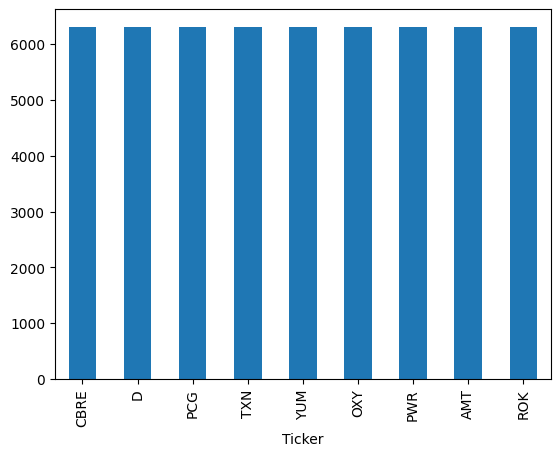

In [7]:
small_df['Ticker'].value_counts().plot(kind='bar')


<Axes: xlabel='Ticker'>

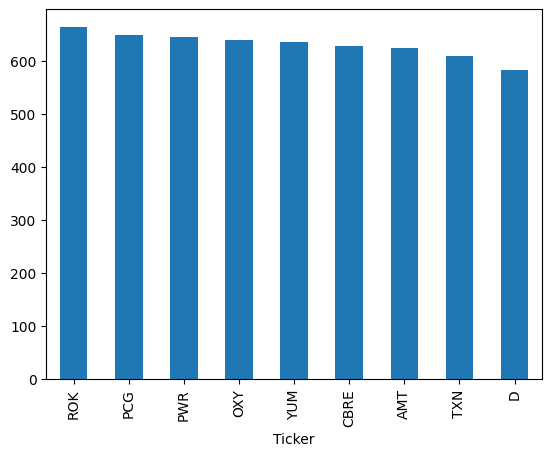

In [8]:
simple_sample_dt['Ticker'].value_counts().plot(kind='bar')


## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='Ticker'>

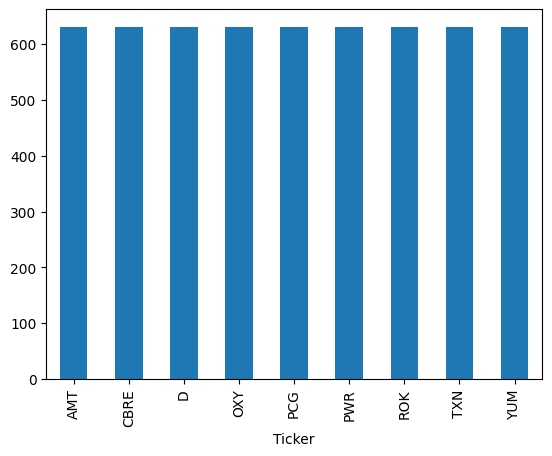

In [9]:
strat_sample_dt = small_df.groupby(['Ticker']).sample(frac = 0.1)
strat_sample_dt['Ticker'].value_counts().plot(kind='bar')


# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\AC\AppData\Local\Temp\ipykernel_6584\2388710987.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  .apply(lambda x: x.sample(frac = 0.1))


<Axes: xlabel='Ticker'>

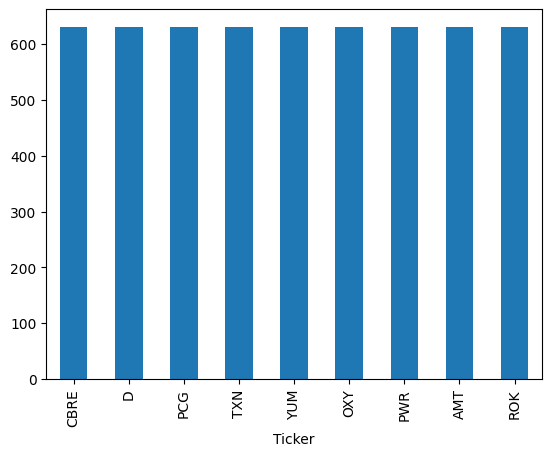

In [10]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('Ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['Ticker'].isin(select_tickers)]['Ticker'].value_counts().plot(kind='bar')
